In [1]:
#importing Required modules

import pandas
import numpy as np
import matplotlib
import math
import random
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from pandas import DataFrame as df
from matplotlib.pyplot import plot

In [2]:
#Sigmoid function

def Sigmoid(t):
    return 1/ (1+np.exp(-t))

In [3]:
# Reading Dataset
dataset = pandas.read_csv("wdbc_dataset.csv", header=None)

In [4]:
# Editing Dataset
dataset[1] = dataset[1].map({"M":1, "B":0})
dataset = dataset.drop([0], axis = 1)

In [5]:
dataset.head()

,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
DS = np.matrix(dataset)
# min-max Normalization for dataset

for i in range (0,DS.shape[1]):
    minimum = DS[:,i].min()
    maximum = DS[:,i].max()
    max_min = maximum - minimum
    DS[:,i] = (DS[:,i] - minimum)/max_min



In [7]:
DS.shape

(569, 31)

In [8]:
# Splitting Data Set
train_data, test_data = train_test_split(DS,test_size = 0.2,train_size = 0.8)

In [9]:
train_data.shape

(455, 31)

In [10]:
T = np.matrix(train_data)
Y = T[:,0] #output Features
X = np.delete(T,0,1) # Input Features

In [11]:
# Splitting Testing Data set
val_data, final_data = train_test_split(test_data,test_size = 0.5,train_size = 0.5)

In [12]:
V = np.matrix(val_data)
Yv = V[:,0] #output Features for Validation
Xv = np.delete(V,0,1) # Input Features for Validation


In [13]:
# Setting Weigths and bias to 0
w = np.zeros((X.shape[1],1))
b = 1

0.07464361365818233


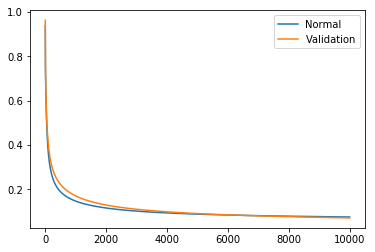

In [14]:
import matplotlib.pyplot as plt
TN = 0
TP = 0
FN = 0
FP = 0
plt_list = []
plt2_list = []
acc_plt = []
for epoch in range(0,10000):
    Z = X.dot(w) + b 
    Zv = Xv.dot(w) + b
    A = Sigmoid(Z)
    Av = Sigmoid(Zv)
    
    dW = np.dot(X.T, (A-Y)) / Y.size
    db = np.sum(A-Y) / Y.size
    
    loss = ( np.multiply(-Y,np.log(A)) - np.multiply((1-Y),np.log(1-A) )).mean()
    #print (loss)mean
    lossV = ( np.multiply(-Yv,np.log(Av)) - np.multiply((1-Yv),np.log(1-Av) )).mean()
    #print (loss)
    w = w - (0.3 * dW)
    b = b - (0.3 * db)
    for i in range(0,57):
        if A[i] >= 0.5 and Y[i] == 1:
            TP = TP + 1
        elif A[i] < 0.5 and Y[i] == 0:
            TN = TN + 1
        elif A[i] >= 0.5 and Y[i] == 0:
            FP = FP + 1
        elif Av[i] < 0.5 and Yv[i] == 1:
            FN = FN + 1
    
    accu = (TP+TN)/(TP+TN+FP+FN)
    
    acc_plt.append(accu)
    
    plt_list.append(loss)
    plt2_list.append(lossV)
    
plot (plt_list,label = "Normal")
plot (plt2_list, label = "Validation")

plt.legend()
print (plt_list[-1])

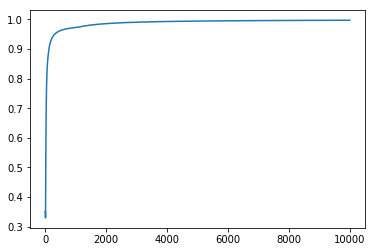

In [15]:
plot(acc_plt)

In [16]:
Zv = Xv.dot(w) + b
Av = Sigmoid(Zv)
TN = 0
TP = 0
FN = 0
FP = 0

for i in range(0,57):
    if Av[i] >= 0.5 and Yv[i] == 1:
        TP = TP + 1
    if Av[i] < 0.5 and Yv[i] == 0:
        TN = TN + 1
    if Av[i] >= 0.5 and Yv[i] == 0:
        FP = FP + 1
    if Av[i] < 0.5 and Yv[i] == 1:
        FN = FN + 1

In [ ]:
def accuracy(w,b):
    Z = Xf.dot(w) + b
    A = Sigmoid(Z)
    for i in range (0,57):
    if A[i] >= 0.5 and Yv[i] == 1:
        TP = TP + 1
    if A[i] < 0.5 and Yv[i] == 0:
        TN = TN + 1
    if Av[i] >= 0.5 and Yv[i] == 0:
        FP = FP + 1
    if Av[i] < 0.5 and Yv[i] == 1:
        FN = FN + 1
        

In [ ]:
(TP+TN)/(TP+TN+FP+FN)

In [ ]:
F = np.matrix(final_data)
Yf = F[:,0] #output Features
Xf = np.delete(F,0,1) # Input Features

In [ ]:
Zf = Xf.dot(w) + b
Af = Sigmoid(Zf)

In [ ]:
TN = 0
TP = 0
FN = 0
FP = 0
for i in range(0,57):
    if Af[i] >= 0.5 and Yf[i] == 1:
        TP = TP + 1
    if Af[i] < 0.5 and Yf[i] == 0:
        TN = TN + 1
    if Af[i] >= 0.5 and Yf[i] == 0:
        FP = FP + 1
    if Af[i] < 0.5 and Yf[i] == 1:
        FN = FN + 1

In [ ]:
Accuracy = (TP+TN)/(TP+TN+FP+FN)

precission = TP/(TP+FP)

recall = TP/ (TP+FN)

Accuracy, precission, recall